# **Market Comparator: Studying the effects of COVID-19 in Different companies**

**Team members:** Kevin Liao, Abdul Azizi, Talal Brek, Faadil Shaikh

**Introduction**

**Data Collection**

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as sms
import pandas as pd
import seaborn
import numpy as np
import requests
import io
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import math
from sklearn.model_selection import cross_validate
import time
from datetime import datetime
from sklearn.decomposition import PCA


Here, we load the Bitcoin data set. For the download_url variable, you may notice a link to a Google Drive file. That is because when we store the data to an external location and access the URL from there, we do not have to keep importing the data into the project folder, which saves a lot of time in the long run.

In [ ]:
#BTC DATASET
#url = 'https://drive.google.com/file/d/1zF1a5EAcyib5Atlo_OYCrHzAabM-iQtd/view?usp=sharing'
url = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/Bitcoin%20prices.csv'
"""file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
response = requests.get(download_url)
content = response.content"""
btc_df = pd.read_csv(url)
unixlst = []
for i in btc_df['Date']:
  date = datetime.strptime(i, '%Y-%m-%d')
  unixlst.append((time.mktime(date.timetuple())))
btc_df['unix'] = unixlst
btc_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,unix
3120,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859,1.680566e+09
3121,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986,1.680653e+09
3122,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380,1.680739e+09
3123,2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497,1.680826e+09
3124,2023-04-08,27923.234375,28158.269531,27887.365234,28032.187500,28032.187500,9243753472,1.680912e+09


In [ ]:
# This makes it so that we are trying to predict the next days closing prices based on the data of todays stock. 
#If we do not do this, its trying to predict todays closing using todays opening, which is not very helpful in predicting
btc_df['N_close'] = btc_df['Close'].shift(1)
btc_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,unix,N_close
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,1.410998e+09,NaN
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,1.411085e+09,424.440002
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,1.411171e+09,394.795990
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,1.411258e+09,408.903992
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,1.411344e+09,398.821014


In [ ]:
btc_rev = btc_df
btc_rev['Past 7 Avg'] = btc_rev.Open.rolling(window=7,min_periods=7).mean()
btc_rev = btc_rev.iloc[::-1]

In [ ]:
btc_rev = btc_rev[1:2645]
btc_rev

,Date,Open,High,Low,Close,Adj Close,Volume,unix,N_close,Past 7 Avg
3123,2023-04-07,28038.966797,28111.593750,27794.031250,27925.859375,27925.859375,10861680497,1.680826e+09,28044.140625,28185.493025
3122,2023-04-06,28175.226563,28178.384766,27738.759766,28044.140625,28044.140625,13837809380,1.680739e+09,28177.984375,28184.535156
3121,2023-04-05,28169.726563,28739.238281,27843.763672,28177.984375,28177.984375,17052315986,1.680653e+09,28168.089844,28209.522880
3120,2023-04-04,27795.273438,28433.742188,27681.304688,28168.089844,28168.089844,15284538859,1.680566e+09,27790.220703,28080.566406
3119,2023-04-03,28183.080078,28475.623047,27276.720703,27790.220703,27790.220703,19556501327,1.680480e+09,28199.308594,27985.940011
...,...,...,...,...,...,...,...,...,...,...
484,2016-01-15,430.255005,430.255005,364.330994,364.330994,364.330994,153351008,1.452816e+09,430.306000,442.244145
483,2016-01-14,432.287994,433.324005,427.845001,430.306000,430.306000,43945500,1.452730e+09,432.371002,446.141715
482,2016-01-13,434.665009,435.186005,424.442993,432.371002,432.371002,173888000,1.452643e+09,435.690002,445.816428
481,2016-01-12,448.182007,448.182007,435.690002,435.690002,435.690002,115607000,1.452557e+09,448.428009,445.415139


In [ ]:
btc_rem = btc_rev.drop(['Date'], axis = 1)
df_normalized=(btc_rem - btc_rem.mean()) / btc_rem.std()
df_normalized = df_normalized[1:]
pca = PCA(n_components=9)
pca.fit(df_normalized)

PCA(n_components=9)

In [ ]:
df_normalized.head()

,Open,High,Low,Close,Adj Close,Volume,unix,N_close,Past 7 Avg
3122,0.772018,0.729906,0.794869,0.763711,0.763711,-0.287711,1.729758,0.772473,0.775595
3121,0.771683,0.763271,0.801470,0.771879,0.771879,-0.127727,1.728449,0.771869,0.777121
3120,0.748838,0.745097,0.791258,0.771275,0.771275,-0.215708,1.727139,0.748811,0.769243
3119,0.772497,0.747589,0.765826,0.748215,0.748215,-0.003095,1.725829,0.773774,0.763462
3118,0.789565,0.750167,0.804005,0.773180,0.773180,-0.365011,1.724519,0.786694,0.761812


                 PC0       PC1       PC2       PC3       PC4       PC5  \
Open        0.349801 -0.141664  0.023669  0.083633 -0.525272 -0.065376   
High        0.349899 -0.138310  0.038174 -0.089075 -0.049542 -0.549900   
Low         0.349537 -0.149502 -0.003556 -0.240341 -0.053834  0.808242   
Close       0.349700 -0.143306  0.020410 -0.332584  0.383300 -0.114409   
Adj Close   0.349700 -0.143306  0.020410 -0.332584  0.383300 -0.114409   
Volume      0.260687  0.733171  0.627571 -0.009086  0.000634  0.023873   
unix        0.275887  0.566804 -0.776057  0.000485 -0.002396 -0.018633   
N_close     0.349801 -0.141676  0.023413  0.081915 -0.523792 -0.062013   
Past 7 Avg  0.349316 -0.136008  0.021888  0.836236  0.387989  0.095600   

                 PC6       PC7           PC8  
Open       -0.251224  0.711842  0.000000e+00  
High        0.737506 -0.017050  5.989500e-16  
Low         0.376176 -0.005895  6.201972e-16  
Close      -0.293411  0.006814  7.071068e-01  
Adj Close  -0.293411  0.

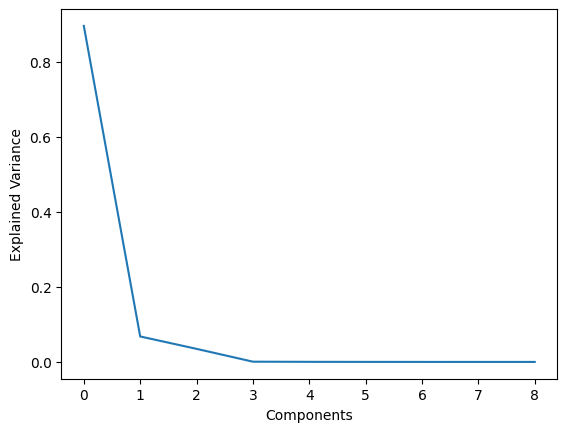

In [ ]:
loadings = pd.DataFrame(pca.components_.T,columns=['PC%s' % _ for _ in range(9)],index=df_normalized.columns)

print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

In [ ]:
# We only keep the 1st 4 eigenvectors because as we can see in the graph, anything beyond the 4th e_vector doesn't contribute a significant amount to the overall data
pca_df_btc = df_normalized.dot(loadings.iloc[:, : 4])
pca_df2 = (loadings.T).dot(df_normalized.T)

In [ ]:
 pca_df_btc

,PC0,PC1,PC2,PC3
3122,2.280777,0.006521,-1.413402,0.015824
3121,2.342019,0.115058,-1.310389,0.005577
3120,2.289563,0.061598,-1.366522,0.000463
3119,2.335470,0.220702,-1.231814,0.018949
3118,2.282383,-0.062631,-1.456273,-0.002669
...,...,...,...,...
484,-2.987016,-0.771558,0.598258,0.006924
483,-2.984351,-0.778136,0.596025,0.003539
482,-2.982860,-0.774203,0.601118,0.003450
481,-2.982766,-0.777566,0.600387,0.003214


<Axes: xlabel='unix', ylabel='Volume'>

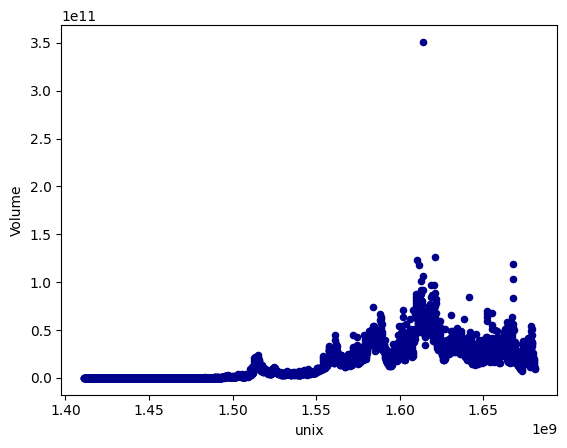

In [ ]:
btc_df.plot.scatter(x= 'unix', y= 'Volume', c = 'darkblue')

Here, we load the Ethereum data set using a similar technique above when we loaded the Bitcoin data set.

In [ ]:
#Eth dataset
url = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/Ethereum%20prices.csv'
'''file_id = url.split('/')[-2]
  print(file_id)
  download_url = f'https://drive.google.com/uc?id={file_id}'
  response = requests.get(download_url)
  content = response.content'''
eth_df = pd.read_csv(url)
#eth_df = pd.read_csv('/content/datasets/ethereum_daily.csv')
eth_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


Here, we load the Paypal data set using the same techniques above.


In [ ]:
#Paypal dataset
url = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/PYPL.csv'
'''file_id = url.split('/')[-2]
  download_url = f'https://drive.google.com/uc?id={file_id}'
  response = requests.get(download_url)
  content = response.content'''
paypal_df = pd.read_csv(url)

paypal_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-07-06 00:00:00-04:00,38.000000,39.750000,36.000000,36.709999,5866600,0.0,0.0
1,2015-07-07 00:00:00-04:00,37.720001,37.810001,36.000000,36.619999,7359000,0.0,0.0
2,2015-07-08 00:00:00-04:00,36.340000,36.360001,34.529999,34.700001,5387700,0.0,0.0
3,2015-07-09 00:00:00-04:00,35.099998,35.520000,33.990002,34.500000,3760100,0.0,0.0
4,2015-07-10 00:00:00-04:00,34.660000,35.189999,33.980000,34.689999,4472800,0.0,0.0


A scatterplot is created for the Paypal data.

<Axes: xlabel='Date', ylabel='Close'>

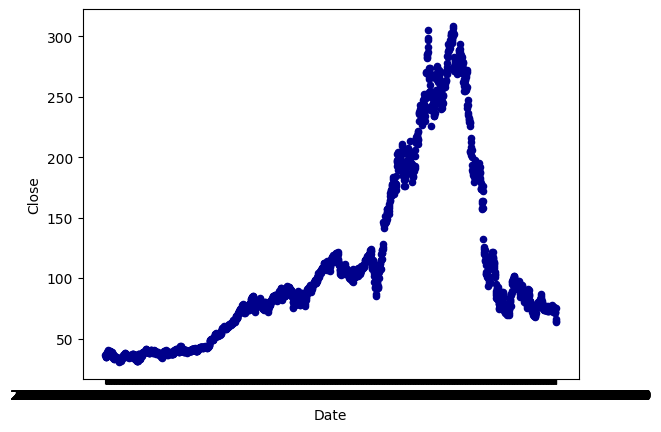

In [ ]:
paypal_df.plot.scatter(x= 'Date', y= 'Close', c = 'darkblue')

Here, instead of loading data from a Google Drive file, we decided to load it directly from a Wikipedia website. However, an issue we faced was that there was a lot of unncessaary data in the table (e.g. year founded, headquarters location). Therefore, we had to drop those columns.

In [ ]:
#S&P Finance Stocks
r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
root = bs(r.content, "html")
sp500 = pd.read_html(root.find('table').prettify())[0]
print(sp500.columns)
fintech_df = sp500[sp500['GICS Sub-Industry'] == 'Transaction & Payment Processing Services']
fintech_df = fintech_df.reset_index()
fintech_df.drop(['index', 'GICS Sub-Industry', 'GICS  Sector', 'CIK', 'Founded', 'Headquarters Location'], axis = 1, inplace = True)
fintech_df
fintech_df[fintech_df['Symbol'] == 'FIS']['Security'][0]
stockMap = {}
for (idx, r) in fintech_df.iterrows():
  stockMap[r['Symbol']] = r['Security']
print(type(fintech_df['Symbol'][0]))
print(type(fintech_df['Security'][0]))
print(type(fintech_df['Date added'][0]))

fintech_df

Index(['Symbol', 'Security', 'GICS  Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')
<class 'str'>
<class 'str'>
<class 'str'>


,Symbol,Security,Date added
0,FIS,FIS,2006-11-10
1,FISV,Fiserv,2001-04-02
2,FLT,Fleetcor,2018-06-20
3,GPN,Global Payments,2016-04-25
4,JKHY,Jack Henry & Associates,2018-11-13
5,MA,Mastercard,2008-07-18
6,PYPL,PayPal,2015-07-20
7,V,Visa Inc.,2009-12-21


In [ ]:
def getName(stockMap, row):
  return stockMap[row['Symbol']]
#url_common_head = 'https://raw.githubusercontent.com/neo-zhao/CMSC320_Final_Tutorial_Huge_Stock_Market_Dataset/main/Stocks/'
#url_common_tail = '.us.txt'
url_common_head = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/'
url_common_tail = '.csv'
fintech_stocks = pd.DataFrame()
unavailable_stocks = []
print(stockMap['FIS'])
for i in range(fintech_df['Symbol'].size):
  try:
    data = pd.read_csv(url_common_head + fintech_df['Symbol'][i] + url_common_tail)
    data['Symbol'] = [fintech_df['Symbol'][i]]*data.shape[0]
    fintech_stocks = pd.concat([fintech_stocks, data], ignore_index=True)
  except:
    print(fintech_df['Symbol'][i] + url_common_tail + ' does not exist in the Huge Stock Market Dataset.')
    unavailable_stocks += [fintech_df['Symbol'][i]]
print(type(fintech_stocks['Date'][1]))
print('{} {}'.format(fintech_stocks['Date'][1], fintech_stocks['Open'][0]))
print(str(len(unavailable_stocks)) + ' companies\' data could not be found in the Huge Stock Market Dataset')
fintech_stocks['Name'] = fintech_stocks.apply(lambda row: getName(stockMap, row), axis=1)

fintech_stocks
#url1 = 'https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/FIS.csv'
#test_df = pd.read_csv('https://raw.githubusercontent.com/TBCode523/CMSC320-Data_Sets/main/datasets/FIS.csv')
#test_df

FIS
<class 'str'>
2001-06-21 00:00:00-04:00 9.64583536005755
0 companies' data could not be found in the Huge Stock Market Dataset


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Name
0,2001-06-20 00:00:00-04:00,9.645835,9.846790,9.605644,9.605644,11000,0.0,0.0,FIS,FIS
1,2001-06-21 00:00:00-04:00,9.846793,10.248703,9.846793,10.248703,39300,0.0,0.0,FIS,FIS
2,2001-06-22 00:00:00-04:00,10.248700,10.308986,10.248700,10.288891,33800,0.0,0.0,FIS,FIS
3,2001-06-25 00:00:00-04:00,10.409465,10.650611,10.409465,10.650611,9100,0.0,0.0,FIS,FIS
4,2001-06-26 00:00:00-04:00,10.650610,10.650610,10.509942,10.630515,109800,0.0,0.0,FIS,FIS
...,...,...,...,...,...,...,...,...,...,...
42978,2023-05-05 00:00:00-04:00,228.339996,232.339996,227.289993,231.779999,6237000,0.0,0.0,V,Visa Inc.
42979,2023-05-08 00:00:00-04:00,231.250000,233.449997,231.250000,232.229996,2938400,0.0,0.0,V,Visa Inc.
42980,2023-05-09 00:00:00-04:00,231.080002,234.089996,230.820007,233.259995,4352100,0.0,0.0,V,Visa Inc.
42981,2023-05-10 00:00:00-04:00,234.300003,234.809998,228.899994,231.270004,5245000,0.0,0.0,V,Visa Inc.


Data Collection:
For the Data Collection portion, we loaded the following datasets: Bitcoin, Ethereum, Paypal, and S&P Financial Stocks. First, we put the data into a shared google drive file, from which we obtained the URL. Thus, we did not have to import the data into the project folder each time. To help us visualize the graphs, we utilized scatter plots.

**Data Cleaning**

In [ ]:
#Dividends, & stock splits doesn't seem very useful
fintech_stocks.drop(['Dividends', 'Stock Splits'],axis = 1, inplace = True)
eth_df.head()
dates = []
for i in eth_df['Date']:
  date = datetime.strptime(i, '%Y-%m-%d')
  #print(type(date))
  dates.append(date)
eth_df['date_time'] = dates
eth_df.drop('Date', axis = 1, inplace = True )
eth_df.head()

#remove any nans or undefined (eth data set)
"""eth_df = eth_df[eth_df.high != 'undefined']
eth_df = eth_df[eth_df.low != 'undefined']
eth_df = eth_df[eth_df.close != 'undefined']"""
eth_df.dropna(axis='columns')

#convert to datetime object (Paypal)
dates = []
for element in paypal_df['Date']:
  #converts from string to datetime object
  date = datetime.strptime(element.split(' ')[0], '%Y-%m-%d')
  dates.append(date)
paypal_df['date_time'] = dates
paypal_df.drop('Date', axis = 1, inplace = True )
paypal_df.head()

#convert to datetime object (Bitcoin)
dates = []
for element in btc_df['Date']:
  #converts from string to datetime object
  date = datetime.strptime(element, '%Y-%m-%d')
  dates.append(date)
btc_df['date_time'] = dates
btc_df.drop(['Date', 'unix'], axis = 1, inplace = True )
btc_df['symbol'] = 'BTC'
btc_df.head()




,Open,High,Low,Close,Adj Close,Volume,N_close,Past 7 Avg,date_time,symbol
0,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,2014-09-18,BTC
1,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,424.440002,NaN,2014-09-19,BTC
2,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,394.795990,NaN,2014-09-20,BTC
3,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,408.903992,NaN,2014-09-21,BTC
4,399.100006,406.915985,397.130005,402.152008,402.152008,24127600,398.821014,NaN,2014-09-22,BTC


Data Cleansing:
At first, we dropped any columns that we thought were not necessary for data analysis and columns that were undefined. One other problem we faced was formatting the dates appropriate for data analysis by converting them to datetime objects. To do so, we created new columns with the datetime objects and dropped the old date columns.

**Data Processing**

In [ ]:
#Creating the master data-set
# we want dates that all datasets share
fintech_stocks.drop(['Open', 'High', 'Low', 'Name'],axis = 1, inplace = True  )
print(type(fintech_stocks['Date'].iloc[0]))
fintech_stocks.head()


<class 'str'>


,Date,Close,Volume,Symbol
0,2001-06-20 00:00:00-04:00,9.605644,11000,FIS
1,2001-06-21 00:00:00-04:00,10.248703,39300,FIS
2,2001-06-22 00:00:00-04:00,10.288891,33800,FIS
3,2001-06-25 00:00:00-04:00,10.650611,9100,FIS
4,2001-06-26 00:00:00-04:00,10.630515,109800,FIS


In [ ]:
numStocks = len(fintech_stocks['Symbol'].unique())
latestDate = datetime.today()
dates = []
for element in fintech_stocks['Date']:
  #converts from string to datetime object
  date = datetime.strptime(element.split(' ')[0], '%Y-%m-%d')
  dates.append(date)
fintech_stocks.insert(0, 'date_time', dates)



dates = []
for i in fintech_stocks['Symbol'].unique():
  r = fintech_stocks[fintech_stocks['Symbol'] == i].iloc[0]
  dates.append(r['date_time'])
latest_start =  max(dates)
print(latest_start)
fintech_stocks = fintech_stocks[fintech_stocks['date_time'] >= latest_start]
fintech_stocksPrice = pd.pivot(fintech_stocks,index ='date_time', columns='Symbol', values='Close')

fintech_stocksPrice.insert(0, 'date_time', fintech_stocksPrice.index)

fintech_stocksPrice = fintech_stocksPrice.reset_index(drop=True)
fintech_stocksPrice.columns.name = None 
print(fintech_stocksPrice.columns)
print(fintech_stocksPrice.shape)

fintech_stocksPrice.head()


2015-07-06 00:00:00
Index(['date_time', 'FIS', 'FISV', 'FLT', 'GPN', 'JKHY', 'MA', 'PYPL', 'V'], dtype='object')
(1978, 9)


,date_time,FIS,FISV,FLT,GPN,JKHY,MA,PYPL,V
0,2015-07-06,55.931908,42.154999,155.419998,51.058762,60.106636,89.989250,36.709999,64.613121
1,2015-07-07,56.092941,42.480000,154.320007,51.390812,60.234531,89.541039,36.619999,64.281120
2,2015-07-08,55.090958,41.705002,152.960007,50.687641,60.033562,88.205894,34.700001,63.294685
3,2015-07-09,55.761936,42.224998,153.610001,51.034348,60.261925,88.730423,34.500000,63.598225
4,2015-07-10,56.871277,43.174999,154.250000,51.737526,61.074921,90.237236,34.689999,64.897690


In [ ]:

fintech_stocksVolume = fintech_stocks[fintech_stocks['date_time'] >= latest_start]
fintech_stocksVolume = pd.pivot(fintech_stocks,index ='date_time', columns='Symbol', values='Close')
fintech_stocks.insert(0, 'date_time', fintech_stocks.index)

fintech_stocks = fintech_stocks.reset_index(drop=True)
fintech_stocks.columns.name = None 
print(fintech_stocks.columns)
print(fintech_stocks.shape)

fintech_stocks.head()

{Timestamp('2020-07-08 00:00:00'), Timestamp('2016-10-17 00:00:00'), Timestamp('2019-02-08 00:00:00'), Timestamp('2020-02-14 00:00:00'), Timestamp('2020-10-27 00:00:00'), Timestamp('2016-01-14 00:00:00'), Timestamp('2015-09-23 00:00:00'), Timestamp('2019-05-31 00:00:00'), Timestamp('2015-08-03 00:00:00'), Timestamp('2020-04-17 00:00:00'), Timestamp('2016-07-29 00:00:00'), Timestamp('2020-04-16 00:00:00'), Timestamp('2016-04-05 00:00:00'), Timestamp('2015-08-06 00:00:00'), Timestamp('2020-05-13 00:00:00'), Timestamp('2020-08-14 00:00:00'), Timestamp('2020-12-15 00:00:00'), Timestamp('2022-04-04 00:00:00'), Timestamp('2016-12-27 00:00:00'), Timestamp('2016-08-04 00:00:00'), Timestamp('2018-05-08 00:00:00'), Timestamp('2021-08-11 00:00:00'), Timestamp('2021-08-20 00:00:00'), Timestamp('2019-06-05 00:00:00'), Timestamp('2022-05-20 00:00:00'), Timestamp('2022-11-22 00:00:00'), Timestamp('2018-07-02 00:00:00'), Timestamp('2022-11-04 00:00:00'), Timestamp('2017-09-06 00:00:00'), Timestamp('20

[Timestamp('2015-07-06 00:00:00'),
 Timestamp('2015-07-07 00:00:00'),
 Timestamp('2015-07-08 00:00:00'),
 Timestamp('2015-07-09 00:00:00'),
 Timestamp('2015-07-10 00:00:00')]

In [ ]:
from functools import reduce
mstock_df = pd.DataFrame()
btc_trimmed = btc_df[['Close', 'date_time']].rename(columns = {'Close':'BTC'})

eth_trimmed = eth_df[['Close', 'date_time']].rename(columns = {'Close':'ETH'})   

mstock_df = reduce(lambda  left,right: pd.merge(left,right,on=['date_time'],
                                            how='outer'), [fintech_stocks, btc_trimmed, eth_trimmed])
mstock_df.dropna(axis = 0,inplace = True)
mstock_df['FINTECH_ETF'] = (mstock_df['FIS'] + mstock_df['FISV'] +mstock_df['FLT'] + mstock_df['GPN'] + mstock_df['JKHY'] + mstock_df['MA'] + mstock_df['PYPL'] + mstock_df['V'])/numStocks
mstock_df.head()


,date_time,FIS,FISV,FLT,GPN,JKHY,MA,PYPL,V,BTC,ETH,FINTECH_ETF
594,2017-11-09,85.513535,64.440002,177.000000,97.124985,107.217506,144.839844,74.099998,108.114166,7143.580078,320.884003,107.293755
595,2017-11-10,85.735329,64.000000,180.550003,96.665375,106.963486,145.082382,73.989998,107.863487,6618.140137,299.252991,107.606257
596,2017-11-13,85.818535,64.080002,181.419998,97.398788,106.173180,145.227951,74.029999,107.400719,6559.490234,316.716003,107.693646
597,2017-11-14,86.354630,64.864998,178.679993,99.100349,106.408379,145.480179,74.489998,107.959900,6635.750000,337.631012,107.917303
598,2017-11-15,86.456284,64.260002,176.479996,97.193436,105.693344,143.908463,73.430000,106.292023,7315.540039,333.356995,106.714193


In [ ]:
mvol_df = pd.DataFrame()
btc_voltrimmed = btc_df[['Volume', 'date_time']].rename(columns = {'Close':'BTC'})

eth_voltrimmed = eth_df[['Volume', 'date_time']].rename(columns = {'Close':'ETH'})   
mvol_df['ETF'] = (mvol_df['FIS'] + mvol_df['FISV'] +mvol_df['FLT'] + mvol_df['GPN'] + mvol_df['JKHY'] + mvol_df['MA'] + mvol_df['PYPL'] + mvol_df['V'])/numStocks
mvol_df

In [ ]:
btc_trim = btc_df[btc_df['date_time'] >= latest_start]
#btc_trim.drop[['open', 'high', 'low', 'Volume BTC', 'Volume USD'] , axis = 1, inplace= True]

Stock Betas

**Data Analysis**